In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
%matplotlib widget

ModuleNotFoundError: No module named 'ipympl'

In [59]:
rewards_range = {
    "flakes": (8**0, (8**1) - 1),
    "grains": (8**1, (8**2) - 1),
    "nuggets": (8**2, (8**3) -1),
    "veins": (8**3, (8**4) - 1),
    "motherlodes": (8**4, 8**5)
}
rewards_range

{'flakes': (1, 7),
 'grains': (8, 63),
 'nuggets': (64, 511),
 'veins': (512, 4095),
 'motherlodes': (4096, 32768)}

In [60]:
total_rewards = {
    "nuggets": 80000000,
    "veins": 1400000,
    "motherlodes": 20000,
}

In [61]:
def decay_calculator(initial, epochs):
    b = 1 / initial
    ln_b = math.log(b)
    return (ln_b / epochs) * -1.0

In [62]:
decay_factor = {
    "nuggets": decay_calculator(total_rewards["nuggets"], 300),
    "veins": decay_calculator(total_rewards["veins"], 200),
    "motherlodes": decay_calculator(total_rewards["motherlodes"], 100),
}
decay_factor

{'nuggets': 0.06065845730879385,
 'veins': 0.07075991397292744,
 'motherlodes': 0.09903487552536128}

In [63]:
total_blocks = 30000000
min_supply = 400000000
max_supply = 400000000
median_increase_in_supply = []
min_increase_in_supply = []
max_increase_in_supply = []
per_epoch = {}
per_epoch_pct = {}
for n in range(0, 301):
    current_epoch = {
        "nuggets": math.trunc(total_rewards['nuggets'] * decay_factor['nuggets']),
        "veins": math.trunc(total_rewards['veins'] * decay_factor['veins']),
        "motherlodes": math.trunc(total_rewards['motherlodes'] * decay_factor['motherlodes']),
        "flakes": math.trunc((total_blocks / 2) - (
            sum(
                [math.trunc(total_rewards['nuggets'] * decay_factor['nuggets']), 
                math.trunc(total_rewards['veins'] * decay_factor['veins']),
                math.trunc(total_rewards['motherlodes'] * decay_factor['motherlodes'])]
            ))),
        "grains": math.trunc((total_blocks / 2) - (
            sum(
                [math.trunc(total_rewards['nuggets'] * decay_factor['nuggets']), 
                math.trunc(total_rewards['veins'] * decay_factor['veins']),
                math.trunc(total_rewards['motherlodes'] * decay_factor['motherlodes'])]
            )))
    }
    
    total_rewards['nuggets'] -= math.trunc(total_rewards['nuggets'] * decay_factor['nuggets'])
    total_rewards['veins'] -= math.trunc(total_rewards['veins'] * decay_factor['veins'])
    total_rewards['motherlodes'] -= math.trunc(total_rewards['motherlodes'] * decay_factor['motherlodes'])
    
    min_increase = sum([current_epoch[key] * rewards_range[key][0] for key in current_epoch.keys()])
    max_increase = sum([current_epoch[key] * rewards_range[key][1] for key in current_epoch.keys()])
    median_increase = (min_increase + max_increase) / 2
    
    min_supply += min_increase
    max_supply += max_increase
    per_epoch[n] = {'min': min_supply, 'max': max_supply, 'median': (min_supply + max_supply) / 2}
    median_increase_in_supply.append(median_increase)
    min_increase_in_supply.append(min_increase)
    max_increase_in_supply.append(max_increase)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
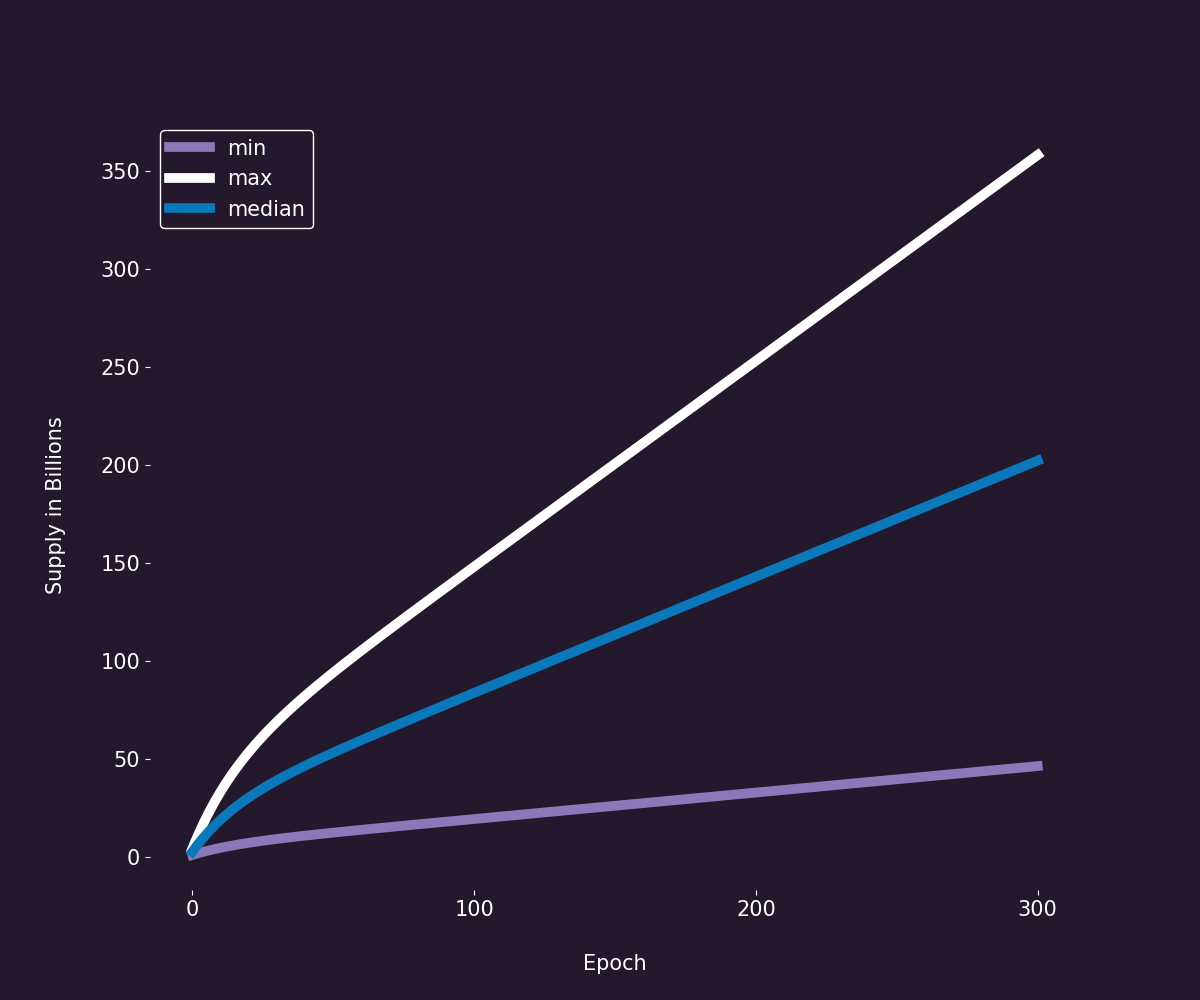

In [64]:
fig, ax = plt.subplots(figsize=(12, 10))
# get inner keys
inner_keys = list(per_epoch.values())[0].keys()

# x-axis is the outer keys
x_axis_values = list(map(str, per_epoch.keys()))

# loop through inner_keys
for x in inner_keys:

    # create a list of values for inner key
    y_axis_values = [(v[x] / 1000000000) for v in per_epoch.values()]

    # plot each inner key
    ax.plot(x_axis_values, y_axis_values, label=x, linewidth=7)
ax.set_xticks(np.arange(0, 301, 100))
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
    ax.xaxis.label.set_fontsize(15)
    ax.yaxis.label.set_fontsize(15)
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(15)
ax.ticklabel_format(style='plain', axis='y')
ax.tick_params(colors='white', which='both')
ax.set_facecolor("#23182c")
fig.patch.set_facecolor("#23182c")
plt.gca().get_lines()[0].set_color("#8B77B9")
plt.gca().get_lines()[1].set_color("white")
plt.gca().get_lines()[2].set_color("#0B78BB")
xlabel = plt.xlabel('Epoch', labelpad=25)
ylabel = plt.ylabel('Supply in Billions', labelpad=25)
xlabel.set_color("white")
ylabel.set_color("white")
legend = plt.legend(frameon = 1, prop={"size": 15})
for text in legend.get_texts():
    text.set_color("white")
frame = legend.get_frame()
legend.get_frame().set_alpha(None)
legend.get_frame().set_facecolor((1, 1, 1, 0.0))
frame.set_edgecolor('white')

In [65]:
plt.savefig("./Coin_Supply.png", transparent=True)

In [66]:
monthly_increase_in_supply = []
min_average_block_reward = []
max_average_block_reward = []
average_block_reward = []
for i in median_increase_in_supply:
    average_block_reward.append(math.trunc(round(i/30000000,0)))
for i in max_increase_in_supply:
    max_average_block_reward.append(math.trunc(round(i/30000000,0)))
for i in min_increase_in_supply:
    min_average_block_reward.append(math.trunc(round(i/30000000, 0)))
for i in median_increase_in_supply:
    monthly_increase_in_supply.append(math.trunc(i/12))

In [67]:
average_price = 50
cost_per_node = 220
n_nodes = 10000000
n_blocks_to_breakeven = [math.trunc(round(cost_per_node /(i * average_price),0)) for i in max_average_block_reward]
pct_of_nodes_required = [round(100 * (n / (total_blocks/12)),5) for n in n_blocks_to_breakeven]
n_nodes_required = [n_nodes * (n / 100) for n in pct_of_nodes_required]
hundred_node_miner = [((((100 / n_nodes) * (total_blocks / 12)) * (n * average_price)) - (100 * cost_per_node)) for n in max_average_block_reward]
one_node_miner = [((1/n_nodes) * (total_blocks/12) * (n * average_price)) for n in max_average_block_reward]

Text(0, 0.5, 'Profit Per Month')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
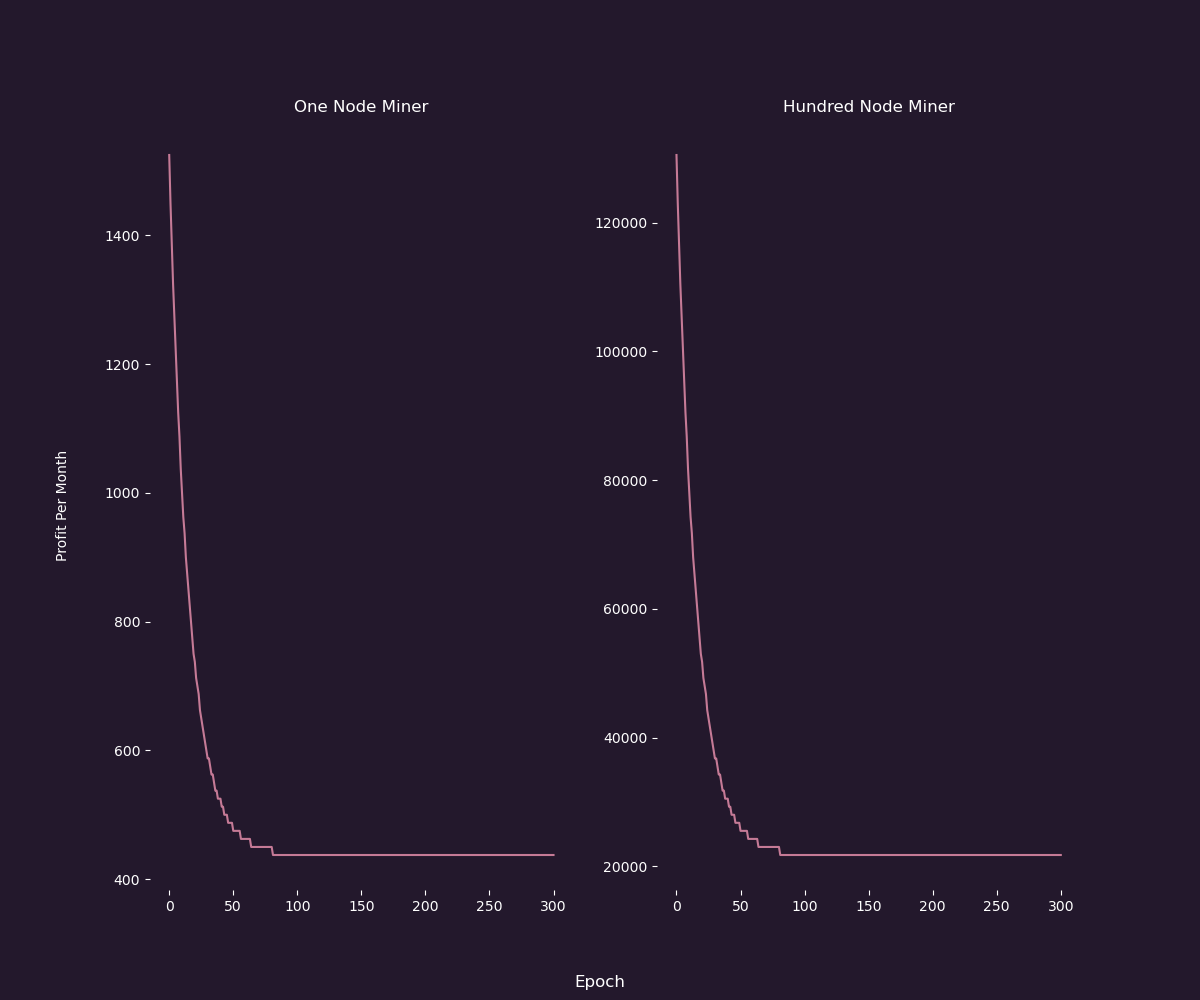

In [68]:
fig2, (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 10), sharex=True)
fig2.supxlabel('Epoch', color="white")
ax2.set_facecolor("#23182c")
ax3.set_facecolor("#23182c")
fig2.patch.set_facecolor("#23182c")
ax.set_xticks(np.arange(0, 301, 100))
for (spine1, spine2) in zip(ax2.spines, ax3.spines):
    ax2.spines[spine1].set_visible(False)
    ax3.spines[spine2].set_visible(False)
ax2.ticklabel_format(style='plain', axis='y')
ax3.ticklabel_format(style='plain', axis='y')
ax2.tick_params(colors='white', which='both')
ax2.set_facecolor("#23182c")
ax3.tick_params(colors='white', which='both')
ax3.set_facecolor("#23182c")
fig.patch.set_facecolor("#23182c")
ax2.plot(one_node_miner, color='#C57A96')
ax3.plot(hundred_node_miner, color='#C57A96')
ax2.set_title("One Node Miner", color="white")
ax3.set_title("Hundred Node Miner", color="white")
ax2.set_ylabel("Profit Per Month", labelpad=25, color="white")

In [69]:
plt.savefig("./ppm_1USD_1000k_nodes.png")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
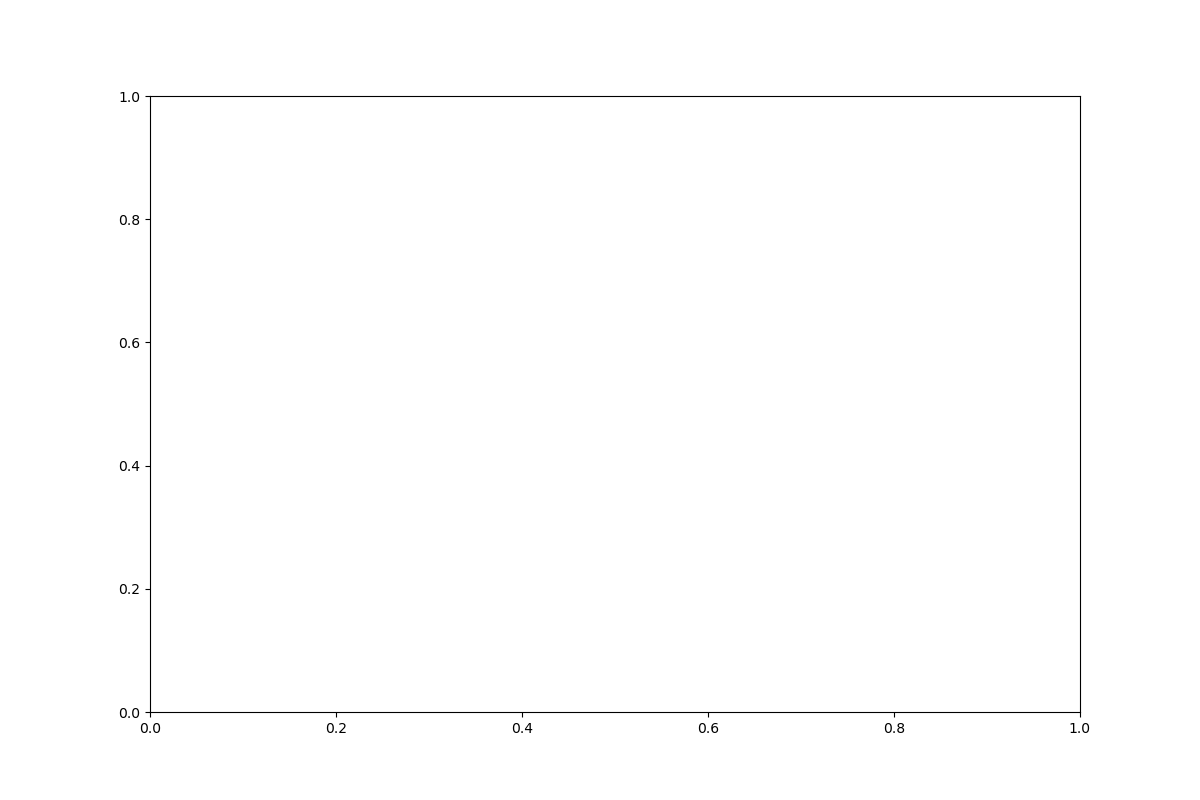

In [70]:
fig3, ax4 = plt.subplots(figsize=(12, 8))

In [71]:
line1 = ax4.plot(average_block_reward, color='black')

In [72]:
for spine in ax4.spines:
    ax4.spines[spine].set_visible(False)

In [73]:
line2 = ax4.plot(min_average_block_reward, color="black")
line3 = ax4.plot(max_average_block_reward, color="black")

In [74]:
import matplotlib.patches as mpatches

In [75]:
# med_patch = mpatches.Patch(color='#C57A96', label="Median")
# min_patch = mpatches.Patch(color="white", label="Minimum")
# max_patch = mpatches.Patch(color='#EB7D49', label="Maximum")
# legend = ax4.legend(handles=[max_patch, med_patch, min_patch])
# for text in legend.get_texts():
#     text.set_color("white")
# frame = legend.get_frame()
# frame.set_facecolor('#23182c')
# frame.set_edgecolor('white')

In [76]:
ax4.set_ylabel("Average Block Reward", labelpad=25, color="black")

Text(108.09722222222221, 0.5, 'Average Block Reward')

In [77]:
ax4.set_xlabel("Epoch", labelpad=25, color="black")

Text(0.5, 58.7222222222222, 'Epoch')

In [78]:
x = np.arange(0, 301, 1)
ax4.fill_between(x, min_average_block_reward, average_block_reward, color="black")
ax4.fill_between(x, max_average_block_reward, average_block_reward, color="black")

In [79]:
for spine in ax4.spines:
    ax4.spines[spine].set_visible(False)
    ax4.xaxis.label.set_fontsize(15)
    ax4.yaxis.label.set_fontsize(15)
    for item in ax4.get_xticklabels() + ax4.get_yticklabels():
        item.set_fontsize(15)
        
xlabel = plt.xlabel('Epoch', labelpad=25)
ylabel = plt.ylabel('Supply in Billions', labelpad=25)

In [80]:
plt.savefig("./average_block_reward_transparent.png", transparent=True)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
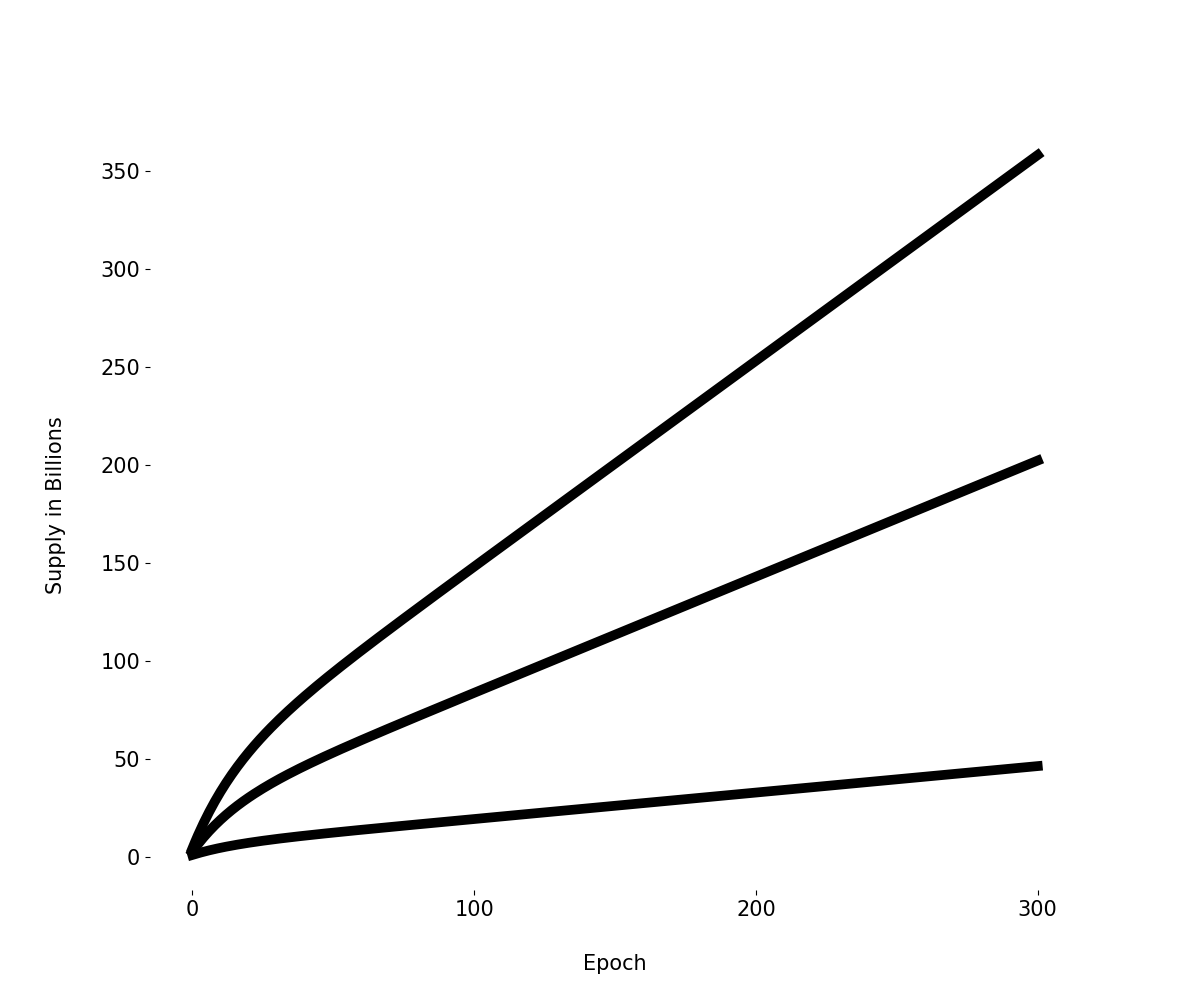

In [81]:
fig, ax = plt.subplots(figsize=(12, 10))
# get inner keys
inner_keys = list(per_epoch.values())[0].keys()

# x-axis is the outer keys
x_axis_values = list(map(str, per_epoch.keys()))

# loop through inner_keys
for x in inner_keys:

    # create a list of values for inner key
    y_axis_values = [(v[x] / 1000000000) for v in per_epoch.values()]

    # plot each inner key
    ax.plot(x_axis_values, y_axis_values, label=x, linewidth=7)
ax.set_xticks(np.arange(0, 301, 100))
for spine in ax.spines:
    ax.spines[spine].set_visible(False)
    ax.xaxis.label.set_fontsize(15)
    ax.yaxis.label.set_fontsize(15)
    for item in ax.get_xticklabels() + ax.get_yticklabels():
        item.set_fontsize(15)
ax.ticklabel_format(style='plain', axis='y')
plt.gca().get_lines()[0].set_color("black")
plt.gca().get_lines()[1].set_color("black")
plt.gca().get_lines()[2].set_color("black")
xlabel = plt.xlabel('Epoch', labelpad=25)
ylabel = plt.ylabel('Supply in Billions', labelpad=25)

In [82]:
plt.savefig("./supply_transparent.png", transparent=True)

In [87]:
avg_block_reward = {}
idx = 0
for mn, md, mx in zip(min_average_block_reward, average_block_reward, max_average_block_reward):
    avg_block_reward[idx] = {'min': mn, 'med': md, 'max': mx}
    idx += 1

avg_block_reward

{0: {'min': 15, 'med': 69, 'max': 122},
 1: {'min': 15, 'med': 65, 'max': 116},
 2: {'min': 14, 'med': 63, 'max': 111},
 3: {'min': 13, 'med': 60, 'max': 106},
 4: {'min': 13, 'med': 57, 'max': 102},
 5: {'min': 12, 'med': 55, 'max': 98},
 6: {'min': 12, 'med': 53, 'max': 94},
 7: {'min': 11, 'med': 51, 'max': 90},
 8: {'min': 11, 'med': 49, 'max': 87},
 9: {'min': 11, 'med': 47, 'max': 83},
 10: {'min': 10, 'med': 45, 'max': 80},
 11: {'min': 10, 'med': 44, 'max': 77},
 12: {'min': 9, 'med': 42, 'max': 75},
 13: {'min': 9, 'med': 41, 'max': 72},
 14: {'min': 9, 'med': 39, 'max': 70},
 15: {'min': 9, 'med': 38, 'max': 68},
 16: {'min': 8, 'med': 37, 'max': 66},
 17: {'min': 8, 'med': 36, 'max': 64},
 18: {'min': 8, 'med': 35, 'max': 62},
 19: {'min': 8, 'med': 34, 'max': 60},
 20: {'min': 7, 'med': 33, 'max': 59},
 21: {'min': 7, 'med': 32, 'max': 57},
 22: {'min': 7, 'med': 31, 'max': 56},
 23: {'min': 7, 'med': 31, 'max': 55},
 24: {'min': 7, 'med': 30, 'max': 53},
 25: {'min': 7, 'm

In [83]:
import json

In [88]:
with open("per_epoch_avg_block_reward.json", "w") as f:
    json.dump(avg_block_reward, f)